In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('/home/rodolfo/bank/bank-full.csv', sep = ";")
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 17)

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df['y'] = df['y'].map({'no':0, 'yes':1}) # enconding da variavel resposta

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00677596a0>,
      dtype=object)

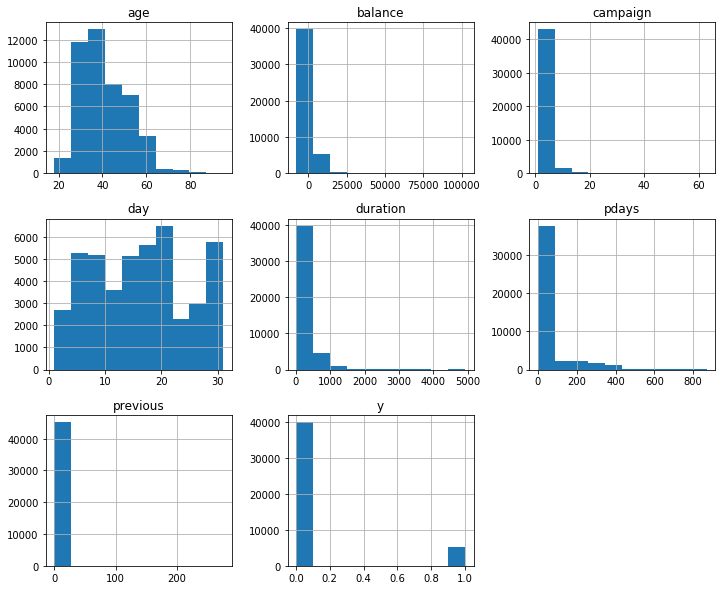

In [8]:
df.hist(figsize=(12,10))

In [9]:
# Dataset é desbalanceado
df['y'].value_counts()/len(df)

0    0.883015
1    0.116985
Name: y, dtype: float64

In [10]:
# Correlações entre variáveis
df.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


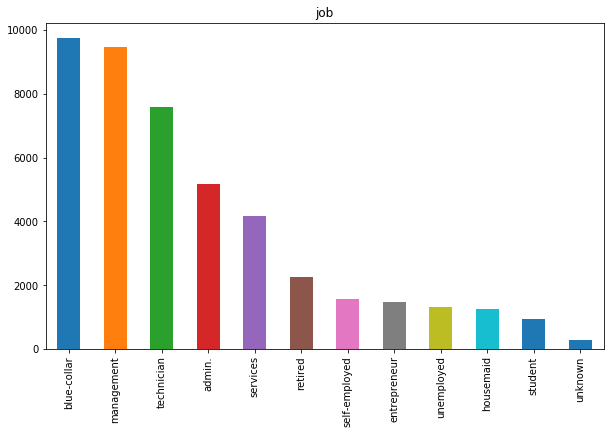

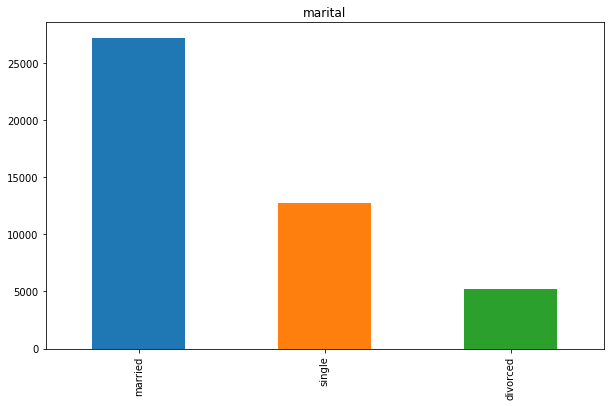

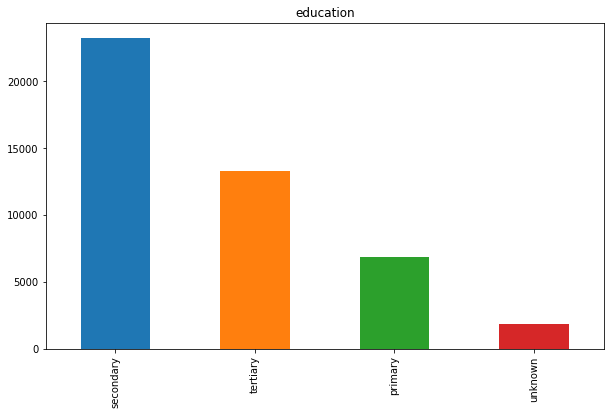

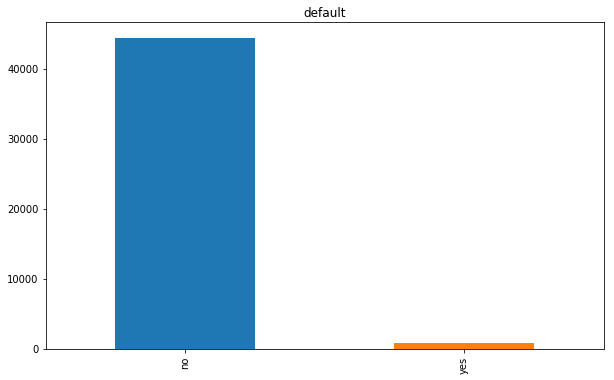

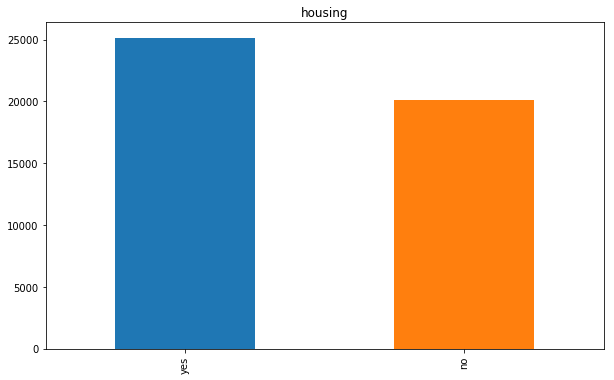

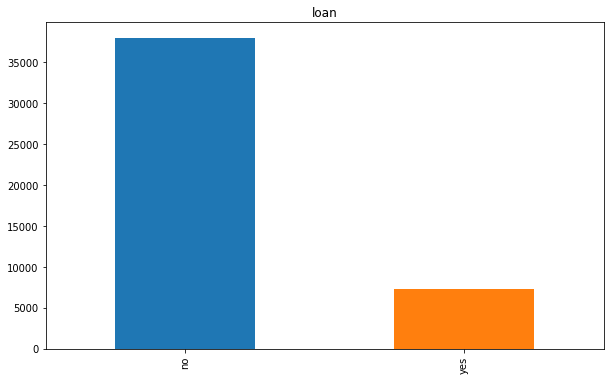

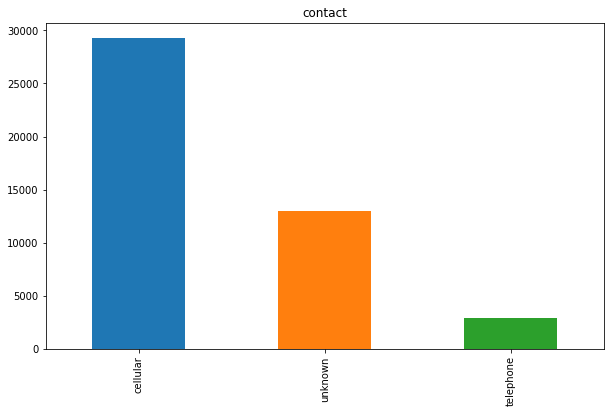

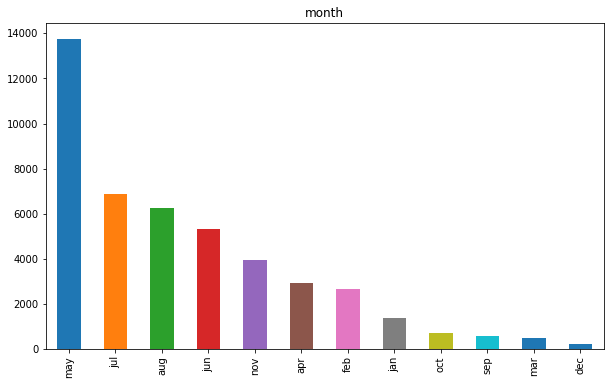

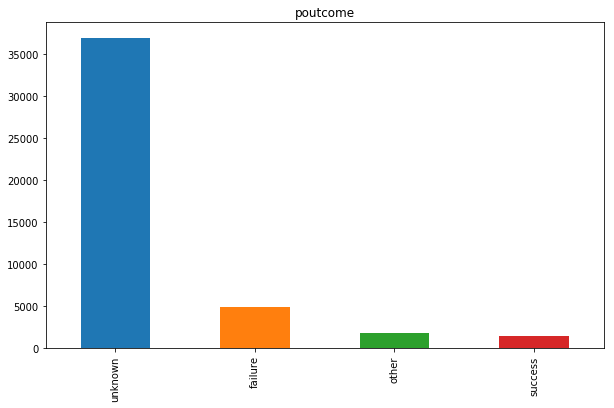

In [11]:
# Visulaizar variaveis cagegoricas
categorical = ['job','marital','education','default','housing','loan','contact','month','poutcome']
for i in categorical:
    df[i].value_counts().plot(kind='bar',figsize = (10, 6),title=i)
    plt.show()

In [12]:
# Enconding das variaveis categoricas
df_new = pd.get_dummies(df)
df_new.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [13]:
import random
random.seed(3434200)

# Cross Validação
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=10, test_size = 0.2, random_state=18)
for train_index, test_index in split.split(df_new, df_new['y']):
    train_set = df_new.loc[train_index]
    test_set = df_new.loc[test_index]

In [14]:
# Distribuição das classes no conjunto treino
train_set['y'].value_counts()/len(train_set)

0    0.883018
1    0.116982
Name: y, dtype: float64

In [15]:
# Lidando com problema de classes desbalanceadas

from sklearn.utils import resample
# Separate majority and minority classes
train_negative = train_set[train_set['y']==0]
train_positive = train_set[train_set['y']==1]
 
# Criando amostras de bootstrap para a classe positiva 
train_positive_upsample = resample(train_positive, replace=True, n_samples=10000,random_state=18) 
 
# Combinando os dois cojuntos
train_upsample = pd.concat([train_negative, train_positive_upsample])
 
# Conjunto final
train_upsample['y'].value_counts()

0    31937
1    10000
Name: y, dtype: int64

In [16]:
X_train = train_upsample.drop('y', axis=1)
X_test = test_set.drop('y', axis=1)
y_train = train_upsample['y']
y_test = test_set['y']

# Conjunto original
X_imb = train_set.drop('y', axis=1)
y_imb = train_set['y']

In [17]:
from sklearn.metrics import roc_curve, auc

# Treino com gridsearch e report das métricas de melhor modelo com cross validação em 10 folds
def fit_classifier(model, X, y, parameters=None, scorer_metrics=None):

    # Grid Search
    grid_obj = GridSearchCV(estimator = model, param_grid = parameters, scoring=make_scorer(scorer_metrics), cv=10)
    grid_fit = grid_obj.fit(X, y)
    model_estimator = grid_fit.best_estimator_
    model_estimator.fit(X, y)
    y_pred = model_estimator.predict(X)

    print("\n")
    print("\nModel performance on training set\n------------------------")
    print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(y, y_pred)))
    print("Final precision score on training data: {:.4f}".format(precision_score(y, y_pred)))
    print("Final Recall score on training data: {:.4f}".format(recall_score(y, y_pred)))
    print("Final ROC AUC score on training data: {:.4f}".format(roc_auc_score(y, y_pred)))
    print("\n")
    print("The best parameters are: {}".format(model_estimator))

    return model_estimator

# Report no conjuno teste
def classifier_test(model_fit, X, y):
    y_pred = model_fit.predict(X)
    print("\n")
    print("\nModel performance on test set\n------------------------")
    print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y, y_pred)))
    print("Final precision score on testing data: {:.4f}".format(precision_score(y, y_pred)))
    print("Final Recall score on testing data: {:.4f}".format(recall_score(y, y_pred)))
    print("Final ROC AUC score on testing data: {:.4f}".format(roc_auc_score(y, y_pred)))
    return y_pred


# Plotar a curva ROC
def roc_curve_plot(model, X, y,label=None):
    # make sure positive class prediction is in the second column of binary prediction
    if label=='Neural Network':
        y_score = model.predict_proba(X)[:,0]
    else:
        y_score = model.predict_proba(X)[:,1]
    
    # generate ROC curve data
    roc = roc_curve(y, y_score)
    
    plt.plot(roc[0], roc[1], label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')

# Treinando os Modelos

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [19]:
# Regressão Logistica

from sklearn.linear_model import LogisticRegression

# Criando lista de parametros
parameters_LR = {'C': [0.0006,0.0007, 0.0008], 'penalty': ['l1', 'l2']}

model_LR = fit_classifier(LogisticRegression(random_state=18), X_train, y_train, 
                          parameters=parameters_LR, scorer_metrics=recall_score)




Model performance on training set
------------------------
Final accuracy score on the training data: 0.8340
Final precision score on training data: 0.7464
Final Recall score on training data: 0.4600
Final ROC AUC score on training data: 0.7055


The best parameters are: LogisticRegression(C=0.0008, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=18,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [20]:
# Regressão Logistica perfomance no conjunto teste
y_test_LR = classifier_test(model_LR, X_test, y_test)




Model performance on test set
------------------------
Final accuracy score on the testing data: 0.8919
Final precision score on testing data: 0.5467
Final Recall score on testing data: 0.4423
Final ROC AUC score on testing data: 0.6969


In [21]:
# random forest 

from sklearn.ensemble import RandomForestClassifier
# Create the parameters list
parameters_RF = {'max_depth': [5,6,7], 'min_samples_leaf': [2,3], 'min_samples_split': [2,3]}

model_RF = fit_classifier(RandomForestClassifier(random_state=18), X_train, y_train, 
                          parameters=parameters_RF, scorer_metrics=recall_score)




Model performance on training set
------------------------
Final accuracy score on the training data: 0.8494
Final precision score on training data: 0.7935
Final Recall score on training data: 0.4979
Final ROC AUC score on training data: 0.7287


The best parameters are: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=18, verbose=0, warm_start=False)


In [22]:
# random forest perfoance no conjunto teste
y_test_RF = classifier_test(model_RF, X_test, y_test)




Model performance on test set
------------------------
Final accuracy score on the testing data: 0.8936
Final precision score on testing data: 0.5597
Final Recall score on testing data: 0.4253
Final ROC AUC score on testing data: 0.6905


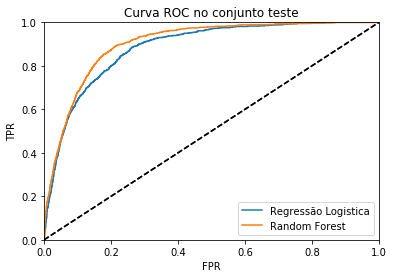

In [23]:
roc_curve_plot(model_LR, X_test, y_test, label='Regressão Logistica')
roc_curve_plot(model_RF, X_test, y_test, label='Random Forest')
plt.title('Curva ROC no conjunto teste')
plt.legend(loc='lower right')